# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [63]:
library('tidyverse')

ERROR: Error in library("repel"): there is no package called ‘repel’


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [4]:
measles = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [58]:
# create the df_vacc_rates here

measles |>
    filter(mmr >=0) |>
    group_by(state)|>
    summarize(sum(mmr >=95), na.rm=TRUE)

df_rates <- measles |>
    summarize(fraction_over_95=sum(mmr>=95, na.rm = TRUE)/n(), .groups = 'drop') |>
    arrange(fraction_over_95)

df_rates |> head()

state,sum(mmr >= 95),na.rm
<chr>,<int>,<lgl>
Arizona,593,TRUE
Arkansas,2,TRUE
California,12639,TRUE
Colorado,939,TRUE
Connecticut,478,TRUE
Illinois,6893,TRUE
Maine,169,TRUE
Massachusetts,826,TRUE
Minnesota,755,TRUE


fraction_over_95
<dbl>
0.5064662


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

Arkansas

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [69]:

statev <- measles |> 
        filter(state == 'North Carolina', overall >= 0)|>
        arrange(overall)|>
        mutate(rn = row_number(), fraction_of_schools = rn/n())

statev |> head()



index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,rn,fraction_of_schools
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,1,0.0004798464
1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,2,0.0009596929
1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,3,0.0014395393
1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,4,0.0019193858
1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5.0,NA,36.06362,-78.92544,5,0.0023992322
1761,North Carolina,2018-19,Nations Ford Elementary,NA,NA,Mecklenburg,NA,117,-1,45.3,NA,0.9,NA,35.15489,-80.90022,6,0.0028790787


In [67]:
median <-  statev |>
    dplyr:: mutate(overallmedianvalue = median(overall))
median |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,rn,fraction_of_schools,overallmedianvalue
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,1,0.0004798464,100
1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,2,0.0009596929,100
1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,3,0.0014395393,100
1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,4,0.0019193858,100
1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5.0,NA,36.06362,-78.92544,5,0.0023992322,100
1761,North Carolina,2018-19,Nations Ford Elementary,NA,NA,Mecklenburg,NA,117,-1,45.3,NA,0.9,NA,35.15489,-80.90022,6,0.0028790787,100


(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

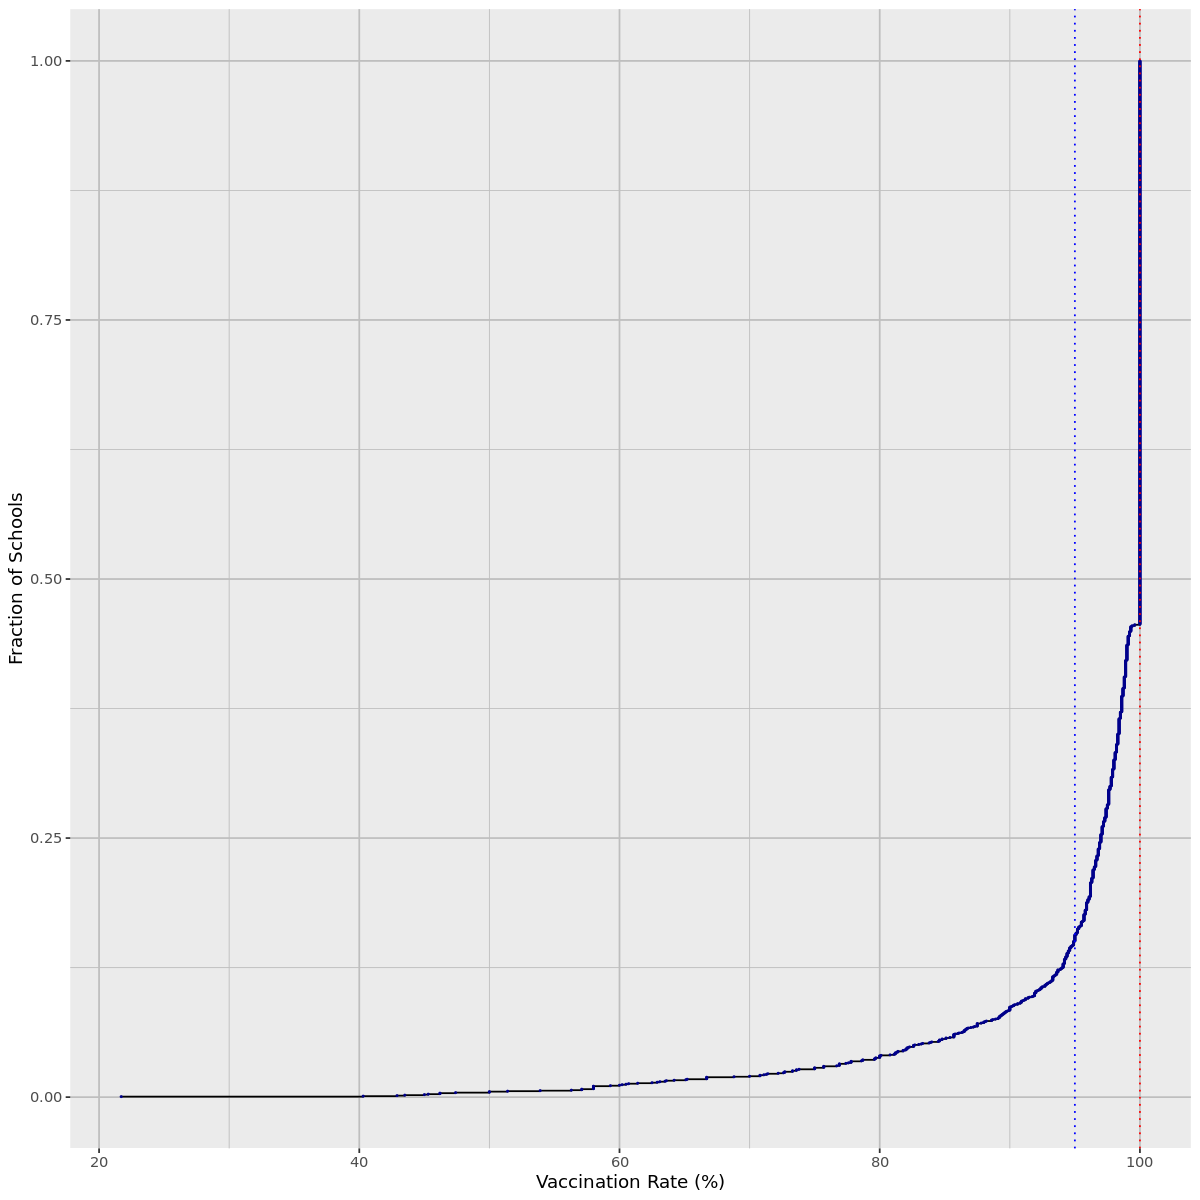

In [70]:
options(repr.plot.width = 10, repr.plot.height = 10)
p = ggplot(statev, aes(x=overall, y=fraction_of_schools)) + #stat_summary(fun=median, geom="vline", aes(xintercept=stat(x), y="fraction_of_schools"), color="red")+
    geom_step() +
    geom_point(size=0.2, color='darkblue') +
    geom_vline(xintercept = 95 , color='blue', linetype = 'dotted')+ geom_vline(xintercept = 100 , color='red', linetype = 'dotted')+
    theme(panel.grid = element_line(color="gray")) +
        xlab("Vaccination Rate (%)") +ylab("Fraction of Schools")
p


![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

yes